## Time Series regression - 1D Convolutional Neural Networks (Conv1D)

In [41]:
# DAL Library
# version 1.0.24

source("https://raw.githubusercontent.com/cefet-rj-dal/dal/main/examples/jupyter_daltoolbox.R")

#loading DAL
load_daltoolbox()
loadlibrary("reticulate")
source("https://raw.githubusercontent.com/cefet-rj-dal/dal/main/examples/ts_conv1d.R")
reticulate::source_python("https://raw.githubusercontent.com/cefet-rj-dal/dal/main/examples/ts_conv1d.py")

### Cosine series for studying

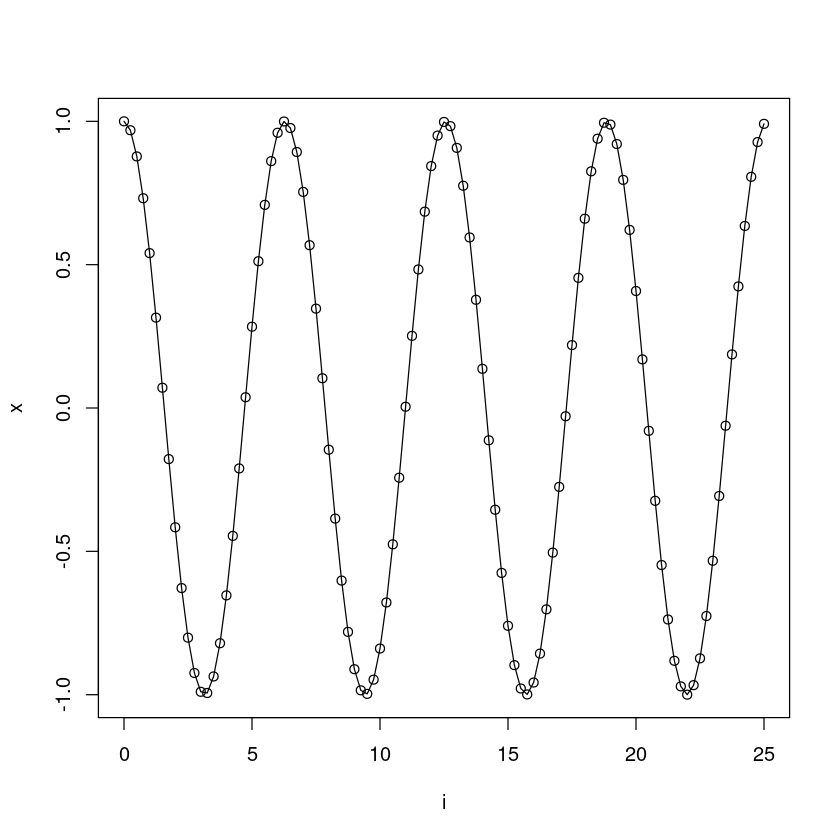

In [42]:
i <- seq(0, 25, 0.25)
x <- cos(i)

plot(i, x)
lines(i, x)

### sliding windows

In [43]:
sw_size <- 10
ts <- ts_data(x, sw_size)
tshead(ts, 3)

t9,t8,t7,t6,t5,t4,t3,t2,t1,t0
1.0000000,0.9689124,0.8775826,0.7316889,0.5403023,0.3153224,0.0707372,-0.1782461,-0.4161468,-0.6281736
0.9689124,0.8775826,0.7316889,0.5403023,0.3153224,0.0707372,-0.1782461,-0.4161468,-0.6281736,-0.8011436
0.8775826,0.7316889,0.5403023,0.3153224,0.0707372,-0.1782461,-0.4161468,-0.6281736,-0.8011436,-0.9243024


### data sampling

In [44]:
test_size <- 1
samp <- ts_sample(ts, test_size)
tshead(samp$train, 3)
tshead(samp$test)

t9,t8,t7,t6,t5,t4,t3,t2,t1,t0
1.0000000,0.9689124,0.8775826,0.7316889,0.5403023,0.3153224,0.0707372,-0.1782461,-0.4161468,-0.6281736
0.9689124,0.8775826,0.7316889,0.5403023,0.3153224,0.0707372,-0.1782461,-0.4161468,-0.6281736,-0.8011436
0.8775826,0.7316889,0.5403023,0.3153224,0.0707372,-0.1782461,-0.4161468,-0.6281736,-0.8011436,-0.9243024


t9,t8,t7,t6,t5,t4,t3,t2,t1,t0
-0.7256268,-0.532833,-0.3069103,-0.06190529,0.1869486,0.424179,0.635036,0.8064095,0.9276444,0.9912028


### data preprocessing

In [45]:
preproc <- ts_gminmax()

### Model training

In [46]:
model <- ts_conv1d(preproc, input_size=4, epochs=10000)

io_train <- ts_projection(samp$train)
model <- fit(model, x=io_train$input, y=io_train$output)

print(describe(model))

ts_conv1d,0.627



[1] "ts_conv1d"


### Evaluation of adjustment

In [47]:
adjust <- predict(model, io_train$input)
ev_adjust <- evaluation.tsreg(io_train$output, adjust)
print(head(ev_adjust$metrics))

          mse       smape
1 1.86304e-06 0.005348762


### Prediction of test

In [48]:
steps_ahead <- 1
io_test <- ts_projection(samp$test)
prediction <- predict(model, x=io_test$input, steps_ahead=steps_ahead)
prediction <- as.vector(prediction)

output <- as.vector(io_test$output)
if (steps_ahead > 1)
    output <- output[1:steps_ahead]

print(sprintf("%.2f, %.2f", output, prediction))

[1] "0.99, 0.99"


### Evaluation of test data

In [49]:
ev_test <- evaluation.tsreg(output, prediction)
print(head(ev_test$metrics))
print(sprintf("%s: smape: %.2f", describe(model), 100*ev_test$metrics$smape))

           mse        smape
1 4.429879e-08 0.0002123182
[1] "ts_conv1d: smape: 0.02"


### Plot results

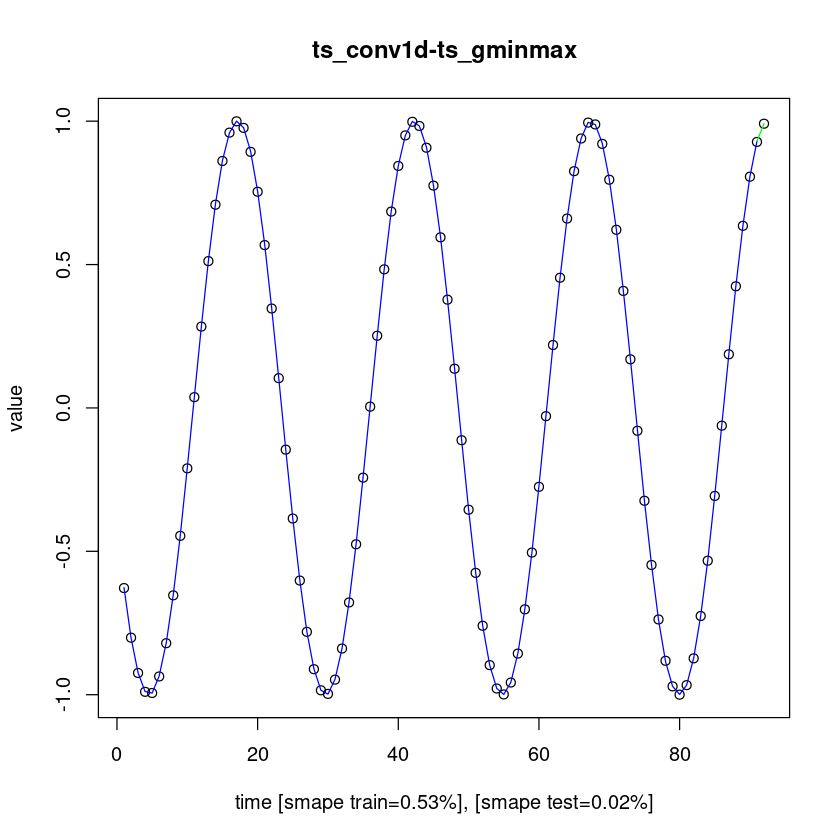

In [50]:
yvalues <- c(io_train$output, io_test$output)
tsplot(model, y=yvalues, yadj=adjust, ypre=prediction)